In [20]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import EC2
from diagrams.aws.management import SystemsManagerParameterStore
from diagrams.aws.security import KMS
from diagrams.aws.network import PrivateSubnet, PublicSubnet, NATGateway, InternetGateway, VPC
from IPython.display import Image

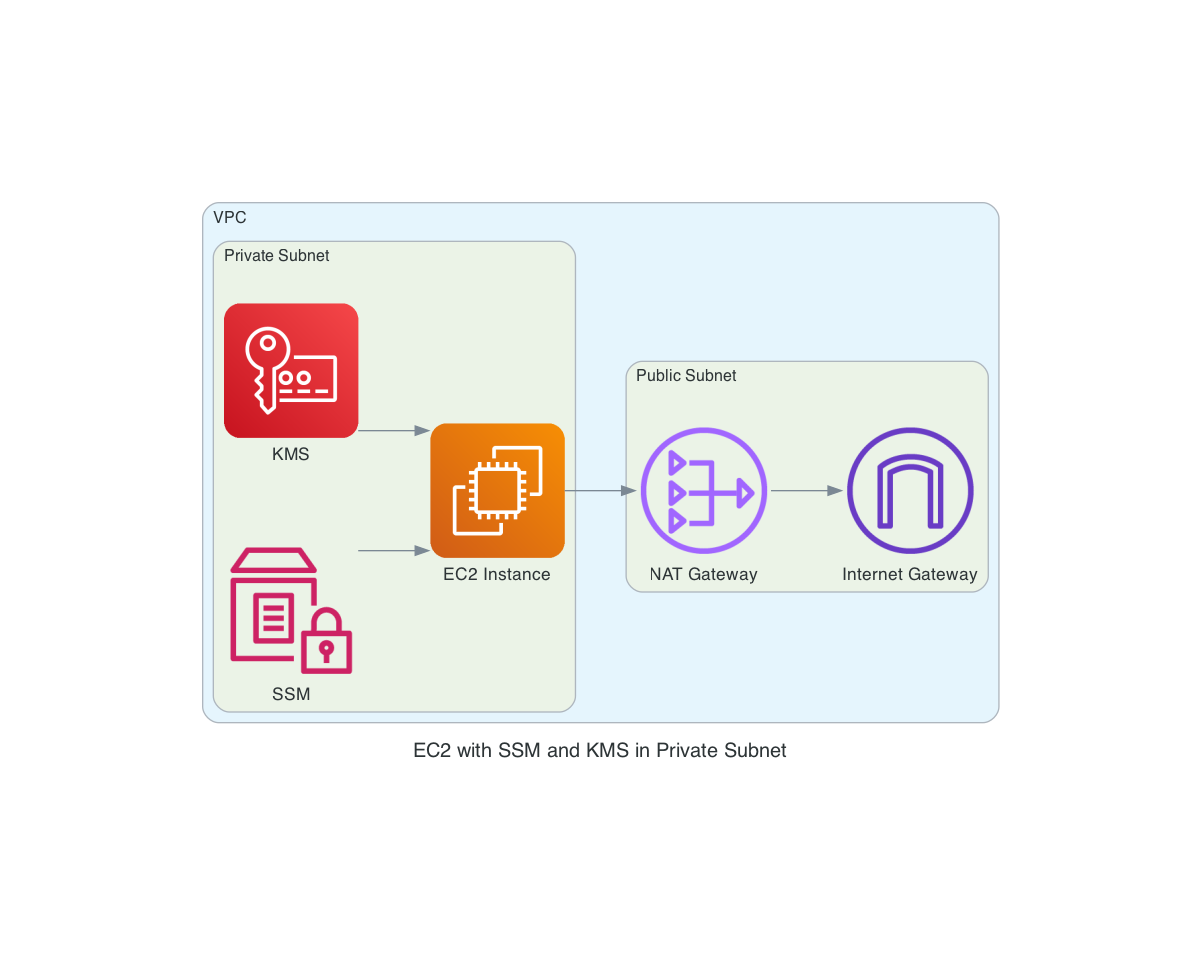

In [30]:
# Define the file name
output_file = "ec2_ssm_kms_diagram.png"
with Diagram("EC2 with SSM and KMS in Private Subnet", show=False, filename=output_file, direction="LR") as diag:
    with Cluster("VPC"):
        with Cluster("Public Subnet"):
            igw = InternetGateway("Internet Gateway")
            nat = NATGateway("NAT Gateway")
        
        with Cluster("Private Subnet"):
            ec2 = EC2("EC2 Instance")
            ssm = SystemsManagerParameterStore("SSM")
            kms = KMS("KMS")

        ec2 >> nat >> igw
        ssm >> ec2
        kms >> ec2

diag